In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

## Ridge Regression scratch

In [2]:
class Ridge_R():
      
    def __init__(self, λ=1e-1):
        self.λ = λ # Ridge regression parameter
          
    def fit(self, X, y):
        self.m, self.n = X.shape
        z1 = (X.T @ X + self.λ * np.eye(self.n))
        z2 = X.T @ y
        self.W = np.linalg.inv(z1) @ z2

    def predict(self, X):    
        return X.dot(self.W)

## Loading boston dataset

Boston housing dataset (train and test files) is taken from sklearn's `load_boston` module

`Note:` You can add any dataset of the form X,y where

**X** must be of the form (samples, features)

In [3]:
X, y = load_boston(return_X_y=True)

## Normalization of the data

In [4]:
row_sums = X.sum(axis=1)
X = X / row_sums[:, np.newaxis]

## Train-Validation-Test split


In [5]:
X_train1, X_test, y_train1, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size = 0.2, random_state=42)

### Adding columns of ones to dataset to incorporate bias term

In [6]:
X_train = np.c_[np.ones(X_train.shape), X_train]
X_train1 = np.c_[np.ones(X_train1.shape), X_train1]
X_val = np.c_[np.ones(X_val.shape), X_val]
X_test = np.c_[np.ones(X_test.shape), X_test]

## Training and hyper-parameter tuning using validation set

Best Ridge regression hyperparameter λ value = 0.001 (lowest MSE)



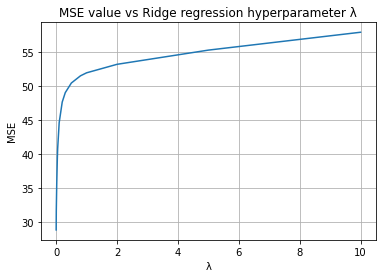

In [7]:
arr = [0.001, 0.005, 0.01, 0.02, 0.04, 0.05, 0.1, 0.2, 0.3, 0.5, 0.8, 1, 2, 5, 10] 

mse = []
best = arr[0]
low_m = np.inf
for λ in arr:
    clf = Ridge_R(λ=λ)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    m = mean_squared_error(y_val, y_pred)
    if m < low_m:
        best = λ
        low_m = m
    mse.append(m)

print('Best Ridge regression hyperparameter λ value =',best,'(lowest MSE)\n')

plt.plot(arr,mse)
plt.title('MSE value vs Ridge regression hyperparameter λ')
plt.xlabel('λ')
plt.ylabel('MSE')
plt.savefig("MSE vs λ (without normalization) .png",dpi=300, bbox_inches='tight')
plt.grid()
plt.show()

## Train and predict on test set using best hyper-parameter

In [8]:
for λ in arr:
    clf = Ridge_R(λ=λ)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("λ value is ",λ)
    print('MSE Test dataset =',mean_squared_error(y_test, y_pred))

λ value is  0.001
MSE Test dataset = 27.920097675104685
λ value is  0.005
MSE Test dataset = 32.15701074267283
λ value is  0.01
MSE Test dataset = 34.28113422595057
λ value is  0.02
MSE Test dataset = 37.05846269866928
λ value is  0.04
MSE Test dataset = 40.3694495511631
λ value is  0.05
MSE Test dataset = 41.466546494592286
λ value is  0.1
MSE Test dataset = 44.702152189342954
λ value is  0.2
MSE Test dataset = 47.50554326435272
λ value is  0.3
MSE Test dataset = 48.94180729059472
λ value is  0.5
MSE Test dataset = 50.55086497989276
λ value is  0.8
MSE Test dataset = 51.83447227797506
λ value is  1
MSE Test dataset = 52.38230677818844
λ value is  2
MSE Test dataset = 53.938931796414465
λ value is  5
MSE Test dataset = 56.43338108925811
λ value is  10
MSE Test dataset = 59.48478375806959


## We are comparing our model with the sklearn's prebuilt Ridge regression model

We find that the MSE value for the test dataset comes out to be exactly the same!

In [9]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=0.001)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('MSE Test dataset =',mean_squared_error(y_test, y_pred))

MSE Test dataset = 27.91907024692098


In [10]:
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from xgboost.sklearn import XGBRegressor

## OTHER ML models

In [11]:
def print_estimator_name(estimator):
    print(estimator.__class__.__name__)

def evaluate(model, X_train, X_test, y_train, y_test):
    print_estimator_name(model)
    #Train Algorithm
    model.fit(X_train, y_train)
    # Make Predictions
    y_pred = model.predict(X_test)
    print('MSE Test dataset =',mean_squared_error(y_test, y_pred))

In [12]:
models = [RandomForestRegressor(random_state=42),DecisionTreeRegressor(),SVR(gamma='auto'),KNeighborsRegressor(),LinearRegression(),Lasso(),ElasticNet()]

In [13]:
for model in models:
    evaluate(model,X_train, X_test, y_train, y_test)
    print()

RandomForestRegressor
MSE Test dataset = 11.820080647058816

DecisionTreeRegressor
MSE Test dataset = 20.275294117647064

SVR
MSE Test dataset = 70.503031796717

KNeighborsRegressor
MSE Test dataset = 32.461086274509796

LinearRegression
MSE Test dataset = 24.538272058823523

Lasso
MSE Test dataset = 75.01815318208105

ElasticNet
MSE Test dataset = 74.76272991184568



## Print and compare top 10 predictions on test dataset

In [14]:
for i in range(10):
    print('predicted =',round(y_pred[i],2),'; Actual =',y_test[i])

predicted = 28.32 ; Actual = 23.6
predicted = 32.05 ; Actual = 32.4
predicted = 18.4 ; Actual = 13.6
predicted = 22.92 ; Actual = 22.8
predicted = 20.56 ; Actual = 16.1
predicted = 22.39 ; Actual = 20.0
predicted = 18.33 ; Actual = 17.8
predicted = 14.65 ; Actual = 14.0
predicted = 23.01 ; Actual = 19.6
predicted = 21.64 ; Actual = 16.8


## Cross-validation MSE using Train and Validation dataset

In [15]:
rs = [0,24,42,100,1]
cv_mse = []
for i in range(len(rs)):
    r = rs[i]
    cv = i+1
    X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size = 0.2, random_state=r)
    clf = Ridge_R(λ=0.001)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    m = mean_squared_error(y_val, y_pred)
    cv_mse.append(m)
cv_mse = np.array(cv_mse)

In [16]:
print("Cross Validation MSE=",cv_mse)
print("mean Cross Validation MSE=",cv_mse.mean())
print("standard deviation of Cross Validation MSE=",cv_mse.std())

Cross Validation MSE= [25.36458032 29.93336936 28.86519825 31.94300478 30.06349012]
mean Cross Validation MSE= 29.23392856654106
standard deviation of Cross Validation MSE= 2.173674384489164


Plotting other important comparisions

### Varying the size of test data set

In [17]:
arr_Testsize = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.65,0.7,0.75]
cv_mse = []
print("size of the Test data", "\t", "MSE")
for t in arr_Testsize:
    cv = i+1
    X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size = t, random_state=42,shuffle= False)
    clf = Ridge_R(λ=0.001)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    m = mean_squared_error(y_val, y_pred)
    
    print(t,"\t","\t","\t",m)
    #print('MSE Test dataset =',m)
    cv_mse.append(m)
cv_mse = np.array(cv_mse)

size of the Test data 	 MSE
0.05 	 	 	 80.45926024462035
0.1 	 	 	 53.19853198510418
0.15 	 	 	 43.9136347205153
0.2 	 	 	 35.95212556834975
0.25 	 	 	 36.04040772462962
0.3 	 	 	 33.80655917349242
0.35 	 	 	 37.533987011
0.4 	 	 	 35.86566660197829
0.45 	 	 	 37.60849189636199
0.5 	 	 	 37.48799897130619
0.55 	 	 	 37.289610946884835
0.65 	 	 	 34.3560622566166
0.7 	 	 	 34.78693114243736
0.75 	 	 	 40.70283669491424


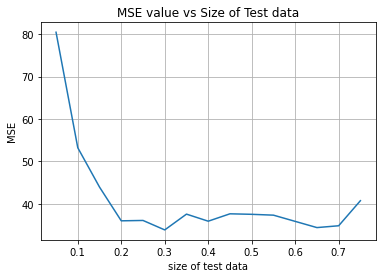

In [18]:
plt.plot(arr_Testsize,cv_mse)
plt.title('MSE value vs Size of Test data')
plt.xlabel('size of test data')
plt.ylabel('MSE')
plt.savefig("MSE vs size of test data .png",dpi=300, bbox_inches='tight')
plt.grid()
plt.show()

### shuffling = True vs Shuffling = false

In [19]:
arr_Testsize = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.65,0.7,0.75]
cv_mse = []
for t in arr_Testsize:
    r = rs[i]
    cv = i+1
    X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size = t, random_state=42,shuffle= True)
    clf = Ridge_R(λ=0.001)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    m = mean_squared_error(y_val, y_pred)
    print("size of test data",t)
    print('MSE Test dataset =',m)
    cv_mse.append(m)
cv_mse = np.array(cv_mse)

size of test data 0.05
MSE Test dataset = 16.175860935647094
size of test data 0.1
MSE Test dataset = 14.968806866678506
size of test data 0.15
MSE Test dataset = 32.82352525443388
size of test data 0.2
MSE Test dataset = 28.865198251050963
size of test data 0.25
MSE Test dataset = 34.20170326213755
size of test data 0.3
MSE Test dataset = 32.92581552724002
size of test data 0.35
MSE Test dataset = 34.65056585976555
size of test data 0.4
MSE Test dataset = 34.52979913767689
size of test data 0.45
MSE Test dataset = 36.059614549332466
size of test data 0.5
MSE Test dataset = 41.96498588835913
size of test data 0.55
MSE Test dataset = 44.406879511063266
size of test data 0.65
MSE Test dataset = 42.364918053559045
size of test data 0.7
MSE Test dataset = 40.75223590977421
size of test data 0.75
MSE Test dataset = 42.80043643830652


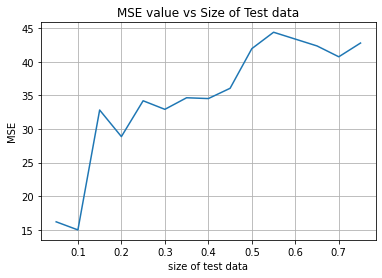

In [20]:
plt.plot(arr_Testsize,cv_mse)
plt.title('MSE value vs Size of Test data')
plt.xlabel('size of test data')
plt.ylabel('MSE')
plt.savefig("MSE vs size of test data .png",dpi=300, bbox_inches='tight')
plt.grid()
plt.show()

In [21]:
arr_Testsize = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.65,0.7,0.75]

In [22]:
def print_estimator_name(estimator):
    print(estimator.__class__.__name__)

def evaluate(model, X_train, X_test, y_train, y_test,t):
    print_estimator_name(model)
    X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size = t, random_state=42,shuffle= True)
    #Train Algorithm
    model.fit(X_train, y_train)
    # Make Predictions
    y_pred = model.predict(X_test)
    print('MSE Test dataset =',mean_squared_error(y_test, y_pred))

In [23]:
for t in arr_Testsize:
    print("size of test dataset=",t)
    print()
    for model in models:
        evaluate(model,X_train, X_test, y_train, y_test,t)
        print()
    

size of test dataset= 0.05

RandomForestRegressor
MSE Test dataset = 12.248529980392153

DecisionTreeRegressor
MSE Test dataset = 12.445686274509802

SVR
MSE Test dataset = 70.05462680019275

KNeighborsRegressor
MSE Test dataset = 28.16649019607843

LinearRegression
MSE Test dataset = 24.34901807598039

Lasso
MSE Test dataset = 75.45415927039987

ElasticNet
MSE Test dataset = 75.23859070849568

size of test dataset= 0.1

RandomForestRegressor
MSE Test dataset = 12.028408637254898

DecisionTreeRegressor
MSE Test dataset = 15.350098039215686

SVR
MSE Test dataset = 70.30651218950402

KNeighborsRegressor
MSE Test dataset = 28.943454901960784

LinearRegression
MSE Test dataset = 24.198351715686275

Lasso
MSE Test dataset = 75.2217241759532

ElasticNet
MSE Test dataset = 75.04968810257303

size of test dataset= 0.15

RandomForestRegressor
MSE Test dataset = 11.410328088235289

DecisionTreeRegressor
MSE Test dataset = 19.228627450980394

SVR
MSE Test dataset = 70.38343319705204

KNeighborsRe

### Random Forest regressor with varying test data size

size of test data 0.05
MSE Test dataset = 43.50298695238091
size of test data 0.1
MSE Test dataset = 27.149500682926817
size of test data 0.15
MSE Test dataset = 21.39380037704917
size of test data 0.2
MSE Test dataset = 17.776808333333314
size of test data 0.25
MSE Test dataset = 19.43797252475247
size of test data 0.3
MSE Test dataset = 19.1141247295082
size of test data 0.35
MSE Test dataset = 18.241984859154922
size of test data 0.4
MSE Test dataset = 17.771896851851842
size of test data 0.45
MSE Test dataset = 19.015267912087907
size of test data 0.5
MSE Test dataset = 18.332579014851486
size of test data 0.55
MSE Test dataset = 18.16208632286995
size of test data 0.65
MSE Test dataset = 17.392584410646375
size of test data 0.7
MSE Test dataset = 18.090367731448758
size of test data 0.75
MSE Test dataset = 21.234224768976887


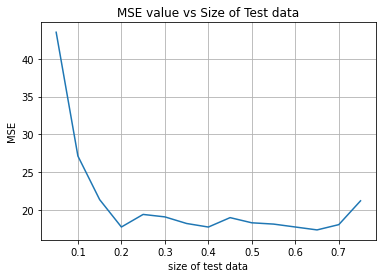

In [24]:
cv_mse = []
for t in arr_Testsize:
    cv = i+1
    X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size = t, random_state=42,shuffle= False)
    clf = RandomForestRegressor(random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    m = mean_squared_error(y_val, y_pred)
    print("size of test data",t)
    print('MSE Test dataset =',m)
    cv_mse.append(m)
cv_mse = np.array(cv_mse)
plt.plot(arr_Testsize,cv_mse)
plt.title('MSE value vs Size of Test data')
plt.xlabel('size of test data')
plt.ylabel('MSE')
plt.savefig("MSE vs size of test data .png",dpi=300, bbox_inches='tight')
plt.grid()
plt.show()

### Decision Tree Regressor 

size of test data 0.05
MSE Test dataset = 56.19666666666666
size of test data 0.1
MSE Test dataset = 45.62268292682927
size of test data 0.15
MSE Test dataset = 38.10655737704917
size of test data 0.2
MSE Test dataset = 33.230493827160494
size of test data 0.25
MSE Test dataset = 27.015148514851482
size of test data 0.3
MSE Test dataset = 28.518360655737702
size of test data 0.35
MSE Test dataset = 29.71352112676057
size of test data 0.4
MSE Test dataset = 31.311666666666664
size of test data 0.45
MSE Test dataset = 30.26917582417583
size of test data 0.5
MSE Test dataset = 28.502722772277224
size of test data 0.55
MSE Test dataset = 31.987174887892373
size of test data 0.65
MSE Test dataset = 40.32121673003802
size of test data 0.7
MSE Test dataset = 40.34325088339222
size of test data 0.75
MSE Test dataset = 39.25858085808581


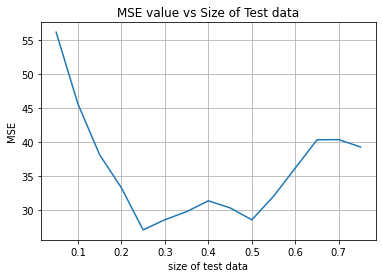

In [25]:
cv_mse = []
for t in arr_Testsize:
    cv = i+1
    X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size = t, random_state=42,shuffle= False)
    clf = DecisionTreeRegressor()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    m = mean_squared_error(y_val, y_pred)
    print("size of test data",t)
    print('MSE Test dataset =',m)
    cv_mse.append(m)
cv_mse = np.array(cv_mse)
plt.plot(arr_Testsize,cv_mse)
plt.title('MSE value vs Size of Test data')
plt.xlabel('size of test data')
plt.ylabel('MSE')
plt.savefig("MSE vs size of test data .png",dpi=300, bbox_inches='tight')
plt.grid()
plt.show()

### Support Vector Regressor

size of test data 0.05
MSE Test dataset = 64.67843639929006
size of test data 0.1
MSE Test dataset = 73.24749435925163
size of test data 0.15
MSE Test dataset = 76.19280873811425
size of test data 0.2
MSE Test dataset = 67.83873693048434
size of test data 0.25
MSE Test dataset = 71.12072079772157
size of test data 0.3
MSE Test dataset = 66.34081220356569
size of test data 0.35
MSE Test dataset = 77.71768512939494
size of test data 0.4
MSE Test dataset = 83.42268276552309
size of test data 0.45
MSE Test dataset = 86.37348704595361
size of test data 0.5
MSE Test dataset = 89.90508671782663
size of test data 0.55
MSE Test dataset = 89.80414060198451
size of test data 0.65
MSE Test dataset = 85.97713206088103
size of test data 0.7
MSE Test dataset = 86.69632868899711
size of test data 0.75
MSE Test dataset = 96.0332711336484


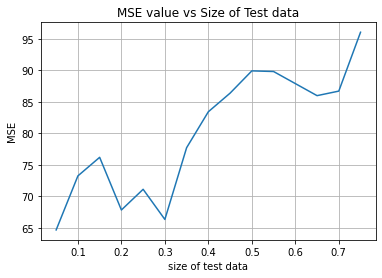

In [26]:
cv_mse = []
for t in arr_Testsize:
    cv = i+1
    X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size = t, random_state=42,shuffle= False)
    clf = SVR(gamma='auto')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    m = mean_squared_error(y_val, y_pred)
    print("size of test data",t)
    print('MSE Test dataset =',m)
    cv_mse.append(m)
cv_mse = np.array(cv_mse)
plt.plot(arr_Testsize,cv_mse)
plt.title('MSE value vs Size of Test data')
plt.xlabel('size of test data')
plt.ylabel('MSE')
plt.savefig("MSE vs size of test data .png",dpi=300, bbox_inches='tight')
plt.grid()
plt.show()

# Knn Regressor

size of test data 0.05
MSE Test dataset = 68.22516190476193
size of test data 0.1
MSE Test dataset = 40.96744390243904
size of test data 0.15
MSE Test dataset = 41.75203278688525
size of test data 0.2
MSE Test dataset = 38.84394074074074
size of test data 0.25
MSE Test dataset = 40.725936633663366
size of test data 0.3
MSE Test dataset = 34.66887540983606
size of test data 0.35
MSE Test dataset = 43.43720563380281
size of test data 0.4
MSE Test dataset = 41.39002962962962
size of test data 0.45
MSE Test dataset = 44.17960439560439
size of test data 0.5
MSE Test dataset = 46.314425742574265
size of test data 0.55
MSE Test dataset = 48.158534529147985
size of test data 0.65
MSE Test dataset = 48.55640152091254
size of test data 0.7
MSE Test dataset = 52.261762544169606
size of test data 0.75
MSE Test dataset = 61.85042376237623


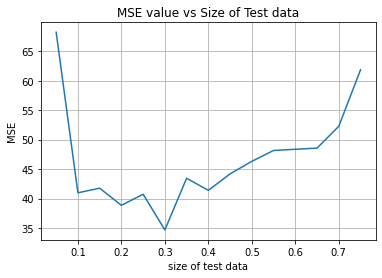

In [27]:
cv_mse = []
for t in arr_Testsize:
    cv = i+1
    X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size = t, random_state=42,shuffle= False)
    clf = KNeighborsRegressor()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    m = mean_squared_error(y_val, y_pred)
    print("size of test data",t)
    print('MSE Test dataset =',m)
    cv_mse.append(m)
cv_mse = np.array(cv_mse)
plt.plot(arr_Testsize,cv_mse)
plt.title('MSE value vs Size of Test data')
plt.xlabel('size of test data')
plt.ylabel('MSE')
plt.savefig("MSE vs size of test data .png",dpi=300, bbox_inches='tight')
plt.grid()
plt.show()

size of test data 0.05
MSE Test dataset = 61.0998769708692
size of test data 0.1
MSE Test dataset = 38.761448170731704
size of test data 0.15
MSE Test dataset = 30.498767930327865
size of test data 0.2
MSE Test dataset = 25.47985532407407
size of test data 0.25
MSE Test dataset = 24.82080416537747
size of test data 0.3
MSE Test dataset = 24.071640469801803
size of test data 0.35
MSE Test dataset = 23.762808181970804
size of test data 0.4
MSE Test dataset = 22.399112785859604
size of test data 0.45
MSE Test dataset = 22.81627743862194
size of test data 0.5
MSE Test dataset = 21.907748673721827
size of test data 0.55
MSE Test dataset = 22.522388277434764
size of test data 0.65
MSE Test dataset = 21.54673986340288
size of test data 0.7
MSE Test dataset = 26.382210389736777
size of test data 0.75
MSE Test dataset = 25.19474283362131


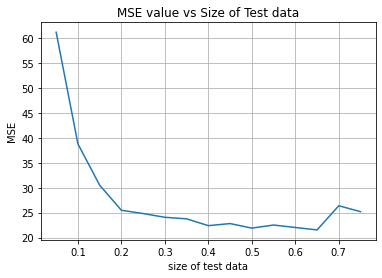

In [28]:
cv_mse = []
for t in arr_Testsize:
    cv = i+1
    X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size = t, random_state=42,shuffle= False)
    clf = LinearRegression()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    m = mean_squared_error(y_val, y_pred)
    print("size of test data",t)
    print('MSE Test dataset =',m)
    cv_mse.append(m)
cv_mse = np.array(cv_mse)
plt.plot(arr_Testsize,cv_mse)
plt.title('MSE value vs Size of Test data')
plt.xlabel('size of test data')
plt.ylabel('MSE')
plt.savefig("MSE vs size of test data .png",dpi=300, bbox_inches='tight')
plt.grid()
plt.show()

### Linear Regression

size of test data 0.05
MSE Test dataset = 61.0998769708692
size of test data 0.1
MSE Test dataset = 38.761448170731704
size of test data 0.15
MSE Test dataset = 30.498767930327865
size of test data 0.2
MSE Test dataset = 25.47985532407407
size of test data 0.25
MSE Test dataset = 24.82080416537747
size of test data 0.3
MSE Test dataset = 24.071640469801803
size of test data 0.35
MSE Test dataset = 23.762808181970804
size of test data 0.4
MSE Test dataset = 22.399112785859604
size of test data 0.45
MSE Test dataset = 22.81627743862194
size of test data 0.5
MSE Test dataset = 21.907748673721827
size of test data 0.55
MSE Test dataset = 22.522388277434764
size of test data 0.65
MSE Test dataset = 21.54673986340288
size of test data 0.7
MSE Test dataset = 26.382210389736777
size of test data 0.75
MSE Test dataset = 25.19474283362131


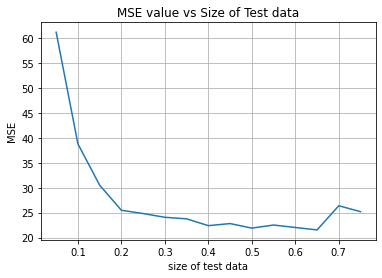

In [29]:
cv_mse = []
for t in arr_Testsize:
    cv = i+1
    X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size = t, random_state=42,shuffle= False)
    clf = LinearRegression()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    m = mean_squared_error(y_val, y_pred)
    print("size of test data",t)
    print('MSE Test dataset =',m)
    cv_mse.append(m)
cv_mse = np.array(cv_mse)
plt.plot(arr_Testsize,cv_mse)
plt.title('MSE value vs Size of Test data')
plt.xlabel('size of test data')
plt.ylabel('MSE')
plt.savefig("MSE vs size of test data .png",dpi=300, bbox_inches='tight')
plt.grid()
plt.show()

### Lasso 

size of test data 0.05
MSE Test dataset = 66.60518001641958
size of test data 0.1
MSE Test dataset = 72.1259239848597
size of test data 0.15
MSE Test dataset = 76.24519952863402
size of test data 0.2
MSE Test dataset = 70.31674782848039
size of test data 0.25
MSE Test dataset = 71.94854534958446
size of test data 0.3
MSE Test dataset = 67.09505473138948
size of test data 0.35
MSE Test dataset = 77.64538535009369
size of test data 0.4
MSE Test dataset = 82.74284570599559
size of test data 0.45
MSE Test dataset = 84.84655654243494
size of test data 0.5
MSE Test dataset = 88.4678453092834
size of test data 0.55
MSE Test dataset = 89.03513557285315
size of test data 0.65
MSE Test dataset = 86.42043588629915
size of test data 0.7
MSE Test dataset = 85.07087527329588
size of test data 0.75
MSE Test dataset = 90.94341861908963


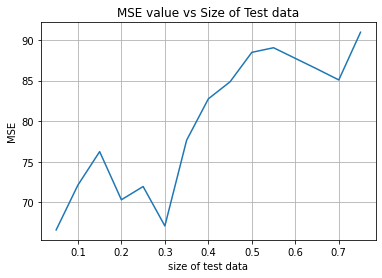

In [30]:
cv_mse = []
for t in arr_Testsize:
    cv = i+1
    X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size = t, random_state=42,shuffle= False)
    clf = Lasso()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    m = mean_squared_error(y_val, y_pred)
    print("size of test data",t)
    print('MSE Test dataset =',m)
    cv_mse.append(m)
cv_mse = np.array(cv_mse)
plt.plot(arr_Testsize,cv_mse)
plt.title('MSE value vs Size of Test data')
plt.xlabel('size of test data')
plt.ylabel('MSE')
plt.savefig("MSE vs size of test data .png",dpi=300, bbox_inches='tight')
plt.grid()
plt.show()

### Elastic Net

size of test data 0.05
MSE Test dataset = 66.53838817594978
size of test data 0.1
MSE Test dataset = 71.98708404783825
size of test data 0.15
MSE Test dataset = 76.04544017519828
size of test data 0.2
MSE Test dataset = 70.08014064973183
size of test data 0.25
MSE Test dataset = 71.66956281056477
size of test data 0.3
MSE Test dataset = 66.7697919081311
size of test data 0.35
MSE Test dataset = 77.28639787057578
size of test data 0.4
MSE Test dataset = 82.50167556157915
size of test data 0.45
MSE Test dataset = 84.65684673170664
size of test data 0.5
MSE Test dataset = 88.30554340528641
size of test data 0.55
MSE Test dataset = 88.91149834936577
size of test data 0.65
MSE Test dataset = 86.35090002414061
size of test data 0.7
MSE Test dataset = 84.85476783565336
size of test data 0.75
MSE Test dataset = 90.77592343522517


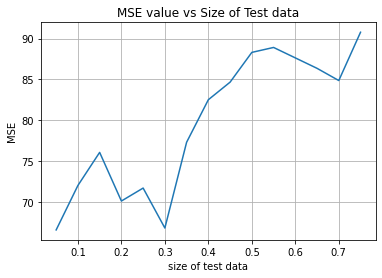

In [31]:
cv_mse = []
for t in arr_Testsize:
    cv = i+1
    X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size = t, random_state=42,shuffle= False)
    clf = ElasticNet()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    m = mean_squared_error(y_val, y_pred)
    print("size of test data",t)
    print('MSE Test dataset =',m)
    cv_mse.append(m)
cv_mse = np.array(cv_mse)
plt.plot(arr_Testsize,cv_mse)
plt.title('MSE value vs Size of Test data')
plt.xlabel('size of test data')
plt.ylabel('MSE')
plt.savefig("MSE vs size of test data .png",dpi=300, bbox_inches='tight')
plt.grid()
plt.show()

### Polynomial Ridge regression

In [46]:
class Ridge_R():
      
    def __init__(self, λ=1e-1):
        self.λ = λ # Ridge regression parameter
          
    def fit(self, X, y,d):
        self.m, self.n = X.shape
        I = np.identity(np.transpose(X).shape[0] , dtype = float)
        z1 = (((X.T @ X)+1*I)**d + self.λ * np.eye(self.n))
        z2 = X.T @ y
        self.W = (np.linalg.inv(z1) @ z2)

    def predict(self, X):    
        return (X.dot(self.W))

Best Ridge regression hyperparameter degree value = 3 (lowest MSE)



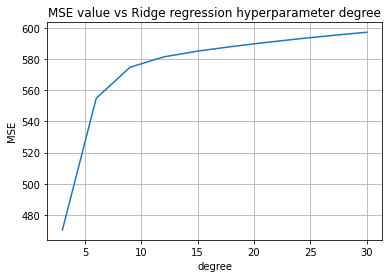

In [47]:
arr = [3,6,9, 12, 15, 18, 21, 24, 27, 30] 

mse = []
best = arr[0]
low_m = np.inf
for d in arr:
    clf = Ridge_R(λ=1)
    clf.fit(X_train, y_train,d)
    y_pred = clf.predict(X_val)
    m = mean_squared_error(y_val, y_pred)
    if m < low_m:
        best = d
        low_m = m
    mse.append(m)

print('Best Ridge regression hyperparameter degree value =',best,'(lowest MSE)\n')

plt.plot(arr,mse)
plt.title('MSE value vs Ridge regression hyperparameter degree')
plt.xlabel('degree')
plt.ylabel('MSE')
plt.savefig("MSE vs λ (without normalization) .png",dpi=300, bbox_inches='tight')
plt.grid()
plt.show()